In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

In [2]:
#Import danych głównych
data = pd.read_csv('all_energy_statistics.csv')

In [3]:
#Import danych o emisji skumulowanej
emissions = pd.read_csv('emissions.csv')

In [4]:
#Import danych o emisji per capita
emissions_capita = pd.read_csv('emissions_capita2.csv')

In [5]:
#Czyszczenie danych emissions_capita

emissions_capita.drop(emissions_capita.index[266:], axis=0, inplace=True)
emissions_capita.drop('Series Code', axis=1, inplace=True)
emissions_capita.drop('Country Code', axis=1, inplace=True)
emissions_capita.drop('Series Name', axis=1, inplace=True)
emissions_capita.drop('2020 [YR2020]', axis=1, inplace=True)
emissions_capita.drop('2021 [YR2021]', axis=1, inplace=True)
emissions_capita2 = emissions_capita.replace('..', np.nan)

emissions_capita = emissions_capita2.astype(
    {'1991 [YR1991]': 'float',
     '1990 [YR1990]': 'float',
     '1992 [YR1992]': 'float',
     '1993 [YR1993]': 'float',
     '1994 [YR1994]': 'float',
     '1995 [YR1995]': 'float',
     '1996 [YR1996]': 'float',
     '1997 [YR1997]': 'float',
     '1998 [YR1998]': 'float',
     '1999 [YR1999]': 'float',
     '2000 [YR2000]': 'float',
     '2001 [YR2001]': 'float',
     '2002 [YR2002]': 'float',
     '2003 [YR2003]': 'float',
     '2004 [YR2004]': 'float',
     '2005 [YR2005]': 'float',
     '2006 [YR2006]': 'float',
     '2007 [YR2007]': 'float',
     '2008 [YR2008]': 'float',
     '2009 [YR2009]': 'float',
     '2010 [YR2010]': 'float',
     '2011 [YR2011]': 'float',
     '2012 [YR2012]': 'float',
     '2013 [YR2013]': 'float',
     '2014 [YR2014]': 'float',
     '2015 [YR2015]': 'float',
     '2016 [YR2016]': 'float',
     '2017 [YR2017]': 'float',
     '2018 [YR2018]': 'float',
     '2019 [YR2019]': 'float'})
emissions_capita.columns = ['Country Name', 1990, 1991, 1992 ,1993, 1994, 
                            1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 
                            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
                            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [6]:
#Emissions per capita - lata z kolumn w wiersze
emissions_capita_t = emissions_capita.melt(id_vars=["Country Name"], 
        var_name='year',
        value_name='emissions_capita').copy()
emissions_capita_t = emissions_capita_t.rename(columns={'Country Name':'country_or_area'})

In [7]:
#Czyszczenie danych emissions

emissions.drop(emissions.index[266:], axis=0, inplace=True)
emissions.drop('Series Code', axis=1, inplace=True)
emissions.drop('Country Code', axis=1, inplace=True)
emissions.drop('Series Name', axis=1, inplace=True)
emissions.drop('2020 [YR2020]', axis=1, inplace=True)
emissions.drop('2021 [YR2021]', axis=1, inplace=True)
emissions2 = emissions.replace('..', np.nan)

emissions = emissions2.astype(
    {'1991 [YR1991]': 'float',
     '1990 [YR1990]': 'float',
     '1992 [YR1992]': 'float',
     '1993 [YR1993]': 'float',
     '1994 [YR1994]': 'float',
     '1995 [YR1995]': 'float',
     '1996 [YR1996]': 'float',
     '1997 [YR1997]': 'float',
     '1998 [YR1998]': 'float',
     '1999 [YR1999]': 'float',
     '2000 [YR2000]': 'float',
     '2001 [YR2001]': 'float',
     '2002 [YR2002]': 'float',
     '2003 [YR2003]': 'float',
     '2004 [YR2004]': 'float',
     '2005 [YR2005]': 'float',
     '2006 [YR2006]': 'float',
     '2007 [YR2007]': 'float',
     '2008 [YR2008]': 'float',
     '2009 [YR2009]': 'float',
     '2010 [YR2010]': 'float',
     '2011 [YR2011]': 'float',
     '2012 [YR2012]': 'float',
     '2013 [YR2013]': 'float',
     '2014 [YR2014]': 'float',
     '2015 [YR2015]': 'float',
     '2016 [YR2016]': 'float',
     '2017 [YR2017]': 'float',
     '2018 [YR2018]': 'float',
     '2019 [YR2019]': 'float'})
emissions.columns = ['Country Name', 1990, 1991, 1992 ,1993, 1994, 
                            1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 
                            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
                            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [8]:
#Emissions - lata z kolumn w wiersz
emissions_t = emissions.melt(id_vars=["Country Name"], 
        var_name='year',
        value_name='emissions').copy()
emissions_t = emissions_t.rename(columns={'Country Name':'country_or_area'})

In [9]:
#Definicja źródeł energii do wyciągania z głównych danych
energy = ['electricity_net_installed_capacity_of_electric_power_plants',
       'falling_water', 'geothermal', 'hydro', 'nuclear_electricity',
       'solar_electricity', 'thermal_electricity',
       'tide_wave_and_ocean_electricity', 'total_electricity',
       'wind_electricity']

not_interesting = ['Electricity - net production', 'Electricity - total production, autoproducer', 'Electricity - total production, main activity']

In [10]:
#Lata 1990-2014 w array
years = data.sort_values('year')['year'].unique()
#Lata 1990-2019 
years2019 = list(range(1990,2020))

In [11]:
#Główne dane - rozdzielenie kolumny commodity_transaction na 2 

split_commodities = data.commodity_transaction.str.split(" - | – ",  expand=True)
split_commodities.columns = ["commodity","transaction_type","additional_transaction_info"]
data = pd.concat([data, 
                split_commodities.commodity.str.lower(),
                split_commodities.transaction_type,
                split_commodities.additional_transaction_info.str.lower()], 
               axis=1)

In [12]:
#Wyciągnięcie danych - tylko energia i tylko produkcja
data_energy_prod = data[(data.category.isin(energy)) & 
                        (~data['commodity_transaction'].isin(not_interesting)) & 
                        (data.transaction_type.str.contains('production'))][['country_or_area','commodity_transaction','year','quantity']].sort_values(['year','commodity_transaction'], ascending = True)

In [13]:
#Utworzenie nowej kolumny %share 
data_energy_prod_gross = data_energy_prod[data_energy_prod['commodity_transaction'] == 'Electricity - Gross production'][['country_or_area','year','quantity']]
data_final = data_energy_prod.merge(data_energy_prod_gross, how='left', on=['year','country_or_area'])
data_final.rename(columns={'quantity_x': 'quantity', 'quantity_y': 'total_quantity'}, inplace=True)
data_final['%share'] = data_final['quantity']/data_final['total_quantity']*100
data_final.drop(columns=['total_quantity'], inplace=True)

In [14]:
#Uzupełnianie brakujących danych 
unique_cd = data_final.commodity_transaction.unique()
unique_country = data_final.country_or_area.unique()
to_append = pd.DataFrame(list(product(years,unique_cd,unique_country)),columns=['year','commodity_transaction','country_or_area'])
to_append['quantity'] = 0 
to_append['%share'] = 0
data = pd.concat([data_final,to_append]).drop_duplicates(subset=['year','commodity_transaction','country_or_area'], keep='first').sort_values(['year','commodity_transaction','country_or_area'], ascending = True)

In [15]:
#Łączenie głównych danych z danymi emisyjnymi
data_all = data.merge(emissions_t, how='left', on=['year','country_or_area'])
data_all = data_all.merge(emissions_capita_t, how='left', on=['year','country_or_area'])

In [30]:
#Przykład dla Polski w 1990 jak działają ostateczne dane 
data_all[(data_all.country_or_area == 'Poland') & (data_all.year == 1990)]

,country_or_area,commodity_transaction,year,quantity,%share,emissions,emissions_capita
169,Poland,Electricity - Gross production,1990,136311.0,100.000000,350210.0,9.189263
410,Poland,Electricity - total geothermal production,1990,0.0,0.000000,350210.0,9.189263
651,Poland,Electricity - total hydro production,1990,3313.0,2.430471,350210.0,9.189263
892,Poland,Electricity - total nuclear production,1990,0.0,0.000000,350210.0,9.189263
1133,Poland,Electricity - total solar production,1990,0.0,0.000000,350210.0,9.189263
1374,Poland,Electricity - total thermal production,1990,132998.0,97.569529,350210.0,9.189263
1615,Poland,"Electricity - total tide, wave production",1990,0.0,0.000000,350210.0,9.189263
1856,Poland,Electricity - total wind production,1990,0.0,0.000000,350210.0,9.189263


In [17]:
#Wykres per capita definiowanie funkcji
def draw_line_emissions_capita(region):
    y = emissions_capita[emissions_capita['Country Name'] == region].iloc[0,1:].transpose()
    plt.plot(years2019, y, label = f'{region}')

In [18]:
#Definiowanie jakie regiony będą uwzględnione na wykresie
regions = ['World','European Union','China', 'Japan', 'India', 'United States', 'Canada', 'Mexico', 'Australia']

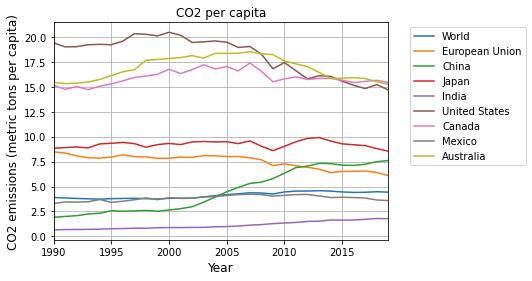

In [19]:
for region in regions:
    draw_line_emissions_capita(region)
plt.xlabel('Year',fontsize=12)
plt.xlim([1990,2019])
plt.ylabel('CO2 emissions (metric tons per capita)',fontsize=12)
plt.title('CO2 per capita')
plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.grid()
plt.show()

def draw_line_emissions(region):
    y = emissions[emissions['Country Name'] == region].iloc[0,1:].transpose()
    plt.plot(years2019,y)

draw_line_emissions(region='Poland')

In [117]:
def mix_energetyczny(kraj):
    dane = data_all[data_all['country_or_area'] == kraj]
    dane_geothermal = dane[dane['commodity_transaction'] == 'Electricity - total geothermal production']
    dane_hydro = dane[dane['commodity_transaction'] == 'Electricity - total hydro production']
    dane_nuclear = dane[dane['commodity_transaction'] == 'Electricity - total nuclear production']
    dane_solar = dane[dane['commodity_transaction'] == 'Electricity - total solar production']
    dane_thermal = dane[dane['commodity_transaction'] == 'Electricity - total thermal production']
    dane_tide = dane[dane['commodity_transaction'] == 'Electricity - total tide, wave production']
    dane_wind = dane[dane['commodity_transaction'] == 'Electricity - total wind production']
    dane_gross = dane[dane['commodity_transaction'] == 'Electricity - Gross production']
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.stackplot(years,
                 dane_thermal['%share'],
                 dane_nuclear['%share'],
                 dane_hydro['%share'],
                 dane_geothermal['%share'],
                 dane_tide['%share'],
                 dane_solar['%share'],
                 dane_wind['%share'],
              labels=['thermal','nuclear','hydro','geothermal','tide','solar','wind'], 
              colors=['grey','lightsalmon','blue','royalblue','navy','gold','limegreen'])
    ax2.plot(years, dane_gross['emissions_capita'], color = 'yellow', label = 'emissions per capita')
    ax1.set_xlabel('Year',fontsize=14)
    plt.xlim([1991,2014])
    ax1.set_ylim([0,100])
    ax2.set_ylim([0,22])
    ax1.set_ylabel('Share (%)',fontsize=14)
    ax2.set_ylabel('CO2 emissions (metric tons per capita)',fontsize=14)
    ax1.set_title(f'{kraj}',fontsize=16)
    ax1.legend(bbox_to_anchor=(1.2, 1.0),loc='upper left')
    ax2.legend(bbox_to_anchor=(1.2, 0.4),loc='upper left')
    plt.show()


In [122]:
Europe = ['Poland','France','Denmark','Germany']

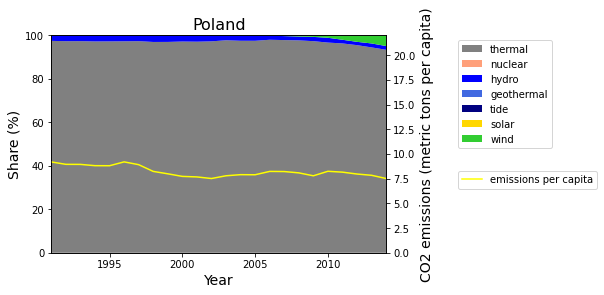

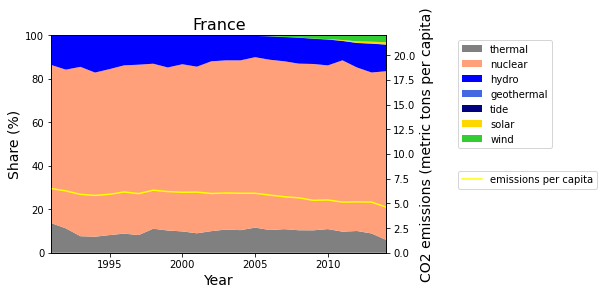

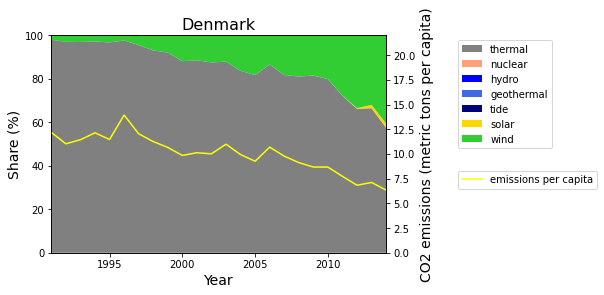

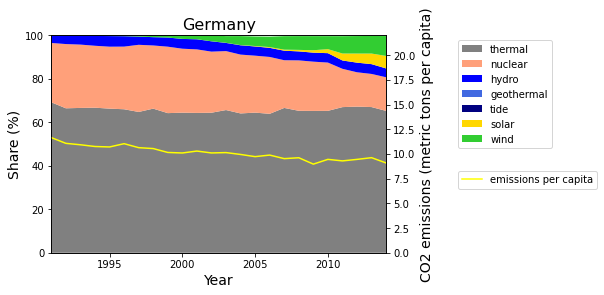

In [123]:
for country in Europe:
    mix_energetyczny(country)

In [124]:
Others = ['China','India','Japan','Australia','United States','Canada','Mexico']

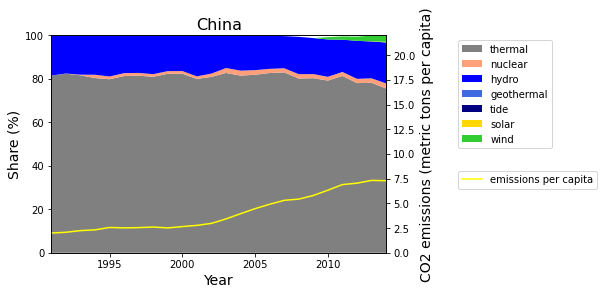

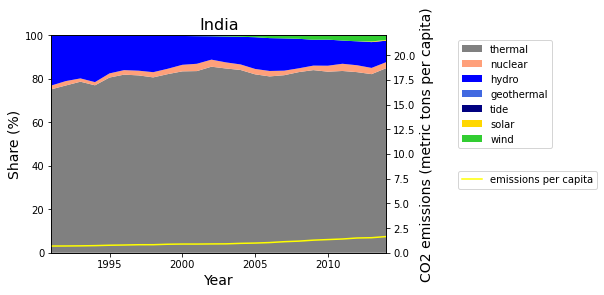

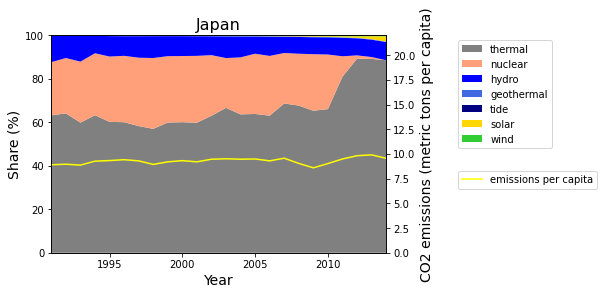

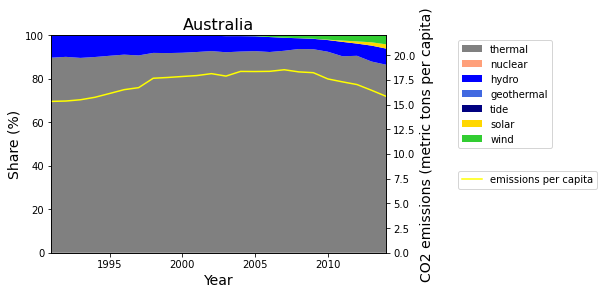

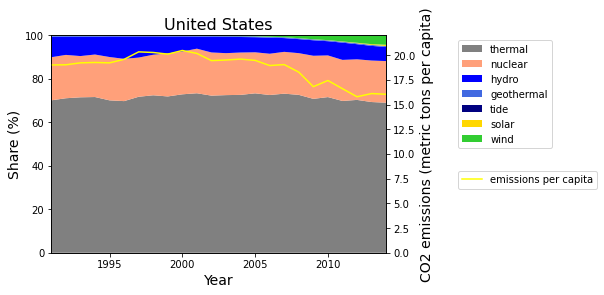

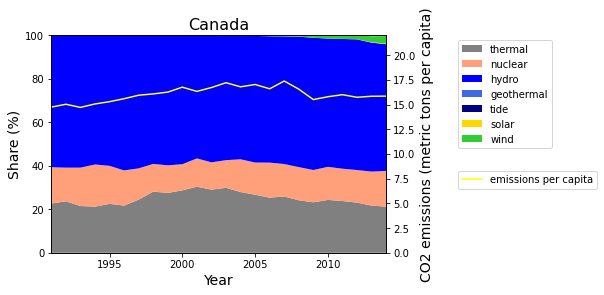

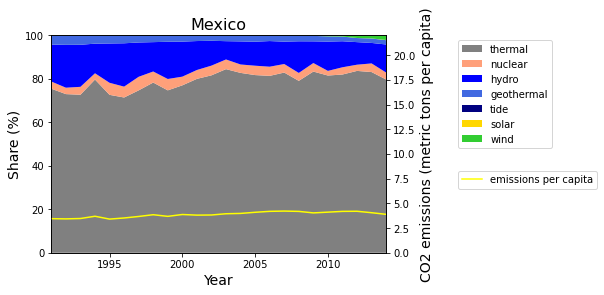

In [125]:
for country in Others:
    mix_energetyczny(country)